In [54]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import random
import os
sns.set(style="white")

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False ## 마이너스 부호 깨짐 방지

In [55]:
def set_random_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
random_seed = 1106
set_random_seed(random_seed)

|컬럼 |내용|
|---|---|
sessionID | 세션 ID|
userID | 사용자 ID|
TARGET | 세션에서 발생한 총 조회수|
browser | 사용된 브라우저|
OS | 사용된 기기의 운영체제|
device | 사용된 기기|
new | 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)|
quality | 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)|
duration | 총 세션 시간 (단위: 초)|
bounced | 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)|
transaction | 세션 내에서 발생의 거래의 수|
transaction_revenue | 총 거래 수익|
continent | 세션이 발생한 대륙|
subcontinent | 세션이 발생한 하위 대륙|
country | 세션이 발생한 국가|
traffic_source | 트래픽이 발생한 소스|
traffic_medium | 트래픽 소스의 매체|
keyword | 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정|
referral_path | traffic_medium이 referral인 경우 설정되는 경로|

## 데이터 로드 

In [56]:
df = pd.read_csv("/3차프로젝트/Weblog_Data/train.csv")
test = pd.read_csv("/3차프로젝트/Weblog_Data/test.csv")

df.head()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


## 데이터 EDA
keyword, referral_path 에서 결측치가 존재하는 것을 확인

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252289 entries, 0 to 252288
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sessionID            252289 non-null  object 
 1   userID               252289 non-null  object 
 2   TARGET               252289 non-null  float64
 3   browser              252289 non-null  object 
 4   OS                   252289 non-null  object 
 5   device               252289 non-null  object 
 6   new                  252289 non-null  int64  
 7   quality              252289 non-null  float64
 8   duration             252289 non-null  float64
 9   bounced              252289 non-null  int64  
 10  transaction          252289 non-null  float64
 11  transaction_revenue  252289 non-null  float64
 12  continent            252289 non-null  object 
 13  subcontinent         252289 non-null  object 
 14  country              252289 non-null  object 
 15  traffic_source   

In [58]:
# duration,transaction_revenue 등 값의 범위가 매우 크기 때문에 데이터 스케일링을 진행할 필요성이 있어보인다. 
df.describe()

,TARGET,new,quality,duration,bounced,transaction,transaction_revenue
count,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,252289.000000,2.522890e+05
mean,3.592626,0.751955,3.816805,113.104253,0.493672,0.009033,9.061248e+05
std,5.509465,0.431879,11.091028,330.876019,0.499961,0.100938,2.127689e+07
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000e+00
75%,4.000000,1.000000,1.000000,71.000000,1.000000,0.000000,0.000000e+00
max,386.000000,1.000000,98.000000,11186.000000,1.000000,12.000000,3.325712e+09


In [59]:
## userID에 중복이 존재한다. (나머지는 중복이 있지만, 카테고리.)
df.describe(include='object')

,sessionID,userID,browser,OS,device,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
count,252289,252289,252289,252289,252289,252289,252289,252289,252289,252289,114614,91182
unique,252289,206024,70,21,3,6,23,205,168,7,623,1578
top,SESSION_000000,USER_002675,Chrome,Windows,desktop,Americas,Northern America,United States,google,organic,Category8,Category1
freq,1,78,174395,88119,167133,126506,111945,104201,116007,107370,103584,18687


In [60]:
test.describe()

,new,quality,duration,bounced,transaction,transaction_revenue
count,79786.000000,79786.000000,79786.000000,79786.000000,79786.000000,7.978600e+04
mean,0.734515,3.967576,121.550635,0.496804,0.007909,9.552892e+05
std,0.441594,11.349192,349.168791,0.499993,0.095260,2.714007e+07
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000e+00
75%,1.000000,1.000000,75.000000,1.000000,0.000000,0.000000e+00
max,1.000000,98.000000,9316.000000,1.000000,7.000000,4.609835e+09


In [61]:
test.describe(include='object')

,sessionID,userID,browser,OS,device,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
count,79786,79786,79786,79786,79786,79786,79786,79786,79786,79786,36716,25895
unique,79786,64535,45,16,3,6,23,192,97,7,211,980
top,SESSION_252289,USER_108579,Chrome,Windows,desktop,Americas,Northern America,United States,google,organic,Category8,Category1
freq,1,58,57503,28383,54730,40429,35465,33179,37210,35894,34598,6050


### 결측치
keyword, referral_path 결측치가 너무 많아 삭제하기에는 데이터 손실로 인하여 대체법 생각

In [62]:
df.isnull().sum()

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64

In [63]:
test.isnull().sum()

sessionID                  0
userID                     0
browser                    0
OS                         0
device                     0
new                        0
quality                    0
duration                   0
bounced                    0
transaction                0
transaction_revenue        0
continent                  0
subcontinent               0
country                    0
traffic_source             0
traffic_medium             0
keyword                43070
referral_path          53891
dtype: int64

### 중복 데이터 확인

In [64]:
df.duplicated().sum()

0

In [65]:
test.duplicated().sum()

0

## 데이터 전처리

In [76]:
## 학습에 사용하지 않을 변수 제거
df.drop(['sessionID', 'userID'] , axis=1, inplace=True)
test.drop(['sessionID', 'userID'] , axis=1, inplace=True)

### 결측치 전처리

In [77]:
## keyword
df['keyword'].fillna("unknown",inplace=True)
test['keyword'].fillna("unknown",inplace=True)

## referral_path
df['referral_path'].fillna("unknown",inplace=True)
test['referral_path'].fillna("unknown",inplace=True)

### 데이터 스케일

#### quality 이상치 처리
- 로그변환으로 축소

In [ ]:
### Train 데이터 전처리
df['quality'] = np.log1p(df['quality'])

### Test 데이터 전처리
test['quality'] = np.log1p(test['quality'])

#### transaction_revenue 이상치 처리
거래 수익이기 때문에 값의 범위를 조절하는 스케일링이 필수적 
- 로그변환으로 축소

In [79]:
### Train 데이터 전처리
df['transaction_revenue'] = np.log1p(df['transaction_revenue'])

### Test 데이터 전처리
test['transaction_revenue'] = np.log1p(test['transaction_revenue'])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
252284    0.0
252285    0.0
252286    0.0
252287    0.0
252288    0.0
Name: transaction_revenue, Length: 252289, dtype: float64

#### duration 이상치 처리
- 로그변환으로 축소

In [ ]:
### Train 데이터 전처리
df['duration'] = np.log1p(df['duration'])

### Test 데이터 전처리
test['duration'] = np.log1p(test['duration'])

### 범주형 전처리 (카테고리로 변경)

In [82]:
categorical_features = [
"browser",
"OS",
"device",
"continent",
"subcontinent",
"country",
"traffic_source",
"traffic_medium",
"keyword",
"referral_path",
]

for i in categorical_features:
    df[i] = df[i].astype('category')
    test[i] = test[i].astype('category')

### 범주형 변수 상관계수 (Cramer-V)

In [83]:
from scipy.stats.contingency import association
from scipy.stats import chi2_contingency

def corr_cramer(x):
    new_tab = pd.crosstab(df['TARGET'], df[x])
    result = association(new_tab, method="cramer")
    return result

In [84]:
# for col in object_col:
#     print(col, "상관계수:", np.round(corr_cramer(col), 5))

## 데이터 분리 - Hold_out

In [85]:
## 데이터 분할
X = df.drop(['TARGET'] , axis=1)
Y = df.TARGET

In [86]:
from sklearn.model_selection import train_test_split

## 학습용 데이터 생성
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=1106)

## 모델 파트

In [94]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
import time

# RMSE 계산 함수 정의
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

In [99]:
# CatBoostRegressor 모델 생성
cbr_model = CatBoostRegressor(cat_features=categorical_features, verbose=False)

# 랜덤 서치를 위한 하이퍼파라미터 공간 설정
param_space = {
    'learning_rate': uniform(0.01, 0.1),     # 학습 속도 범위
    'depth': randint(3, 10),                  # 트리의 깊이 범위
    'n_estimators': randint(100, 1000),        # 트리의 개수 범위
    'loss_function': ['RMSE'],
    'eval_metric': ['RMSE']
}

# 랜덤 서치를 위한 RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=cbr_model,
    param_distributions=param_space,
    n_iter=10,             # 랜덤 서치의 반복 횟수 설정
    cv=KFold(n_splits=5),  # 교차 검증의 폴드 수 설정
    random_state=1106,
    scoring=make_scorer(rmse, greater_is_better=False)  # RMSE를 평가지표로 설정
)

# 랜덤 서치 수행 전 현재 시간 기록
start_time = time.time()

# 랜덤 서치와 교차 검증을 통한 모델 학습
random_search.fit(x_train, y_train)

# 랜덤 서치 수행 후 현재 시간 기록
end_time = time.time()

# 수행 시간 계산
elapsed_time = end_time - start_time

# 최적의 하이퍼파라미터
best_params = random_search.best_params_

# 최적의 하이퍼파라미터와 성능 출력
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (RMSE):", -random_search.best_score_)  # 음수로 출력된 RMSE 값을 양수로 변환하여 출력
print("랜덤 서치 수행 시간:", elapsed_time/60, "분")

Best Hyperparameters: {'depth': 9, 'eval_metric': 'RMSE', 'learning_rate': 0.02527565169642109, 'loss_function': 'RMSE', 'n_estimators': 976}
Best Score (RMSE): 2.760692368525643
랜덤 서치 수행 시간: 77.98044296503068 분


In [105]:
# 모델 생성 시 하이퍼파라미터 설정
cbr_best_model = CatBoostRegressor(
    depth=best_params['depth'], 
    eval_metric=best_params['eval_metric'], 
    learning_rate=best_params['learning_rate'], 
    loss_function=best_params['loss_function'], 
    n_estimators=best_params['n_estimators']
)

# 학습
cbr_model.fit(x_train, y_train, cat_features=categorical_features, verbose=False)

In [106]:
################# 랜덤 결과
# 훈련 세트의 예측값 계산
y_train_pred = cbr_best_model.predict(x_train)

# 검증 세트의 예측값 계산
y_valid_pred = cbr_best_model.predict(x_valid)

# RMSE 계산
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
valid_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print("훈련 세트 RMSE: {:.2f}".format(train_rmse))
print("검증 세트 RMSE: {:.2f}".format(valid_rmse))

훈련 세트 RMSE: 2.47
검증 세트 RMSE: 2.51


In [107]:
from sklearn.metrics import r2_score

R2_train = r2_score(y_train, y_train_pred) # R2
R2_valid = r2_score(y_valid, y_valid_pred) # R2

print("훈련 세트 R2: {:.3f}".format(R2_train))
print("검증 세트 R2: {:.3f}".format(R2_valid))

훈련 세트 R2: 0.802
검증 세트 R2: 0.777


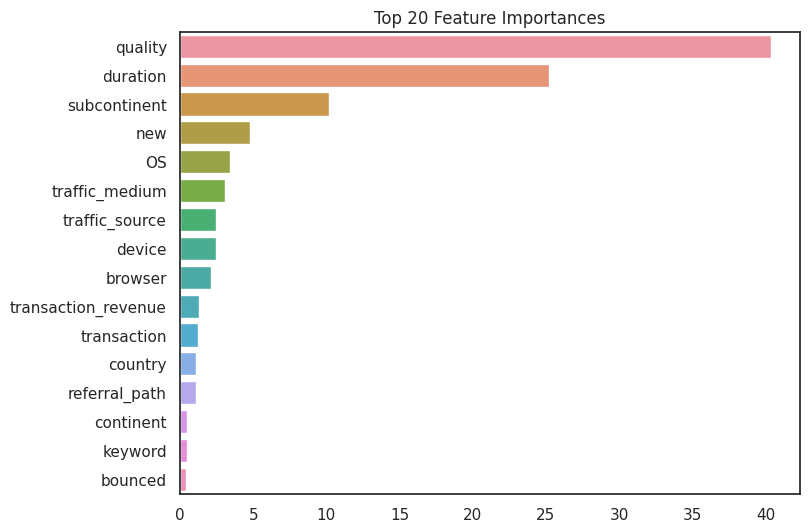

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = cbr_best_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [112]:
preds = cbr_best_model.predict(test)
preds[preds < 0] = 0 ## 0보다 작은 값은 0으로 수정

In [113]:
submission = pd.read_csv('./Weblog_Data/sample_submission.csv')
submission['TARGET'] = preds
submission

,sessionID,TARGET
0,SESSION_252289,25.607261
1,SESSION_252290,0.983906
2,SESSION_252291,2.902347
3,SESSION_252292,4.369085
4,SESSION_252293,10.606499
...,...,...
79781,SESSION_332070,1.054266
79782,SESSION_332071,1.080835
79783,SESSION_332072,2.599720
79784,SESSION_332073,4.824708


In [114]:
# submission.to_csv('./0220_3_submission.csv', index=False)